In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import requests
import pandas as pd
from pathlib import Path
import os
import numpy as np
from PIL import Image
import PIL
from io import BytesIO
import cv2 as cv
import matplotlib.pyplot as plt
import png
from tqdm import tqdm_notebook as tqdm

In [15]:
colors = ['red','green','blue','yellow']
PATH = Path('/home/Deep_Learner/work/network/datasets/human-protein-atlas-image-classification/stage1_data')
PNGS_512 = PATH/'extra_HPAv18_pngs_512/'
PNGS_512.mkdir(exist_ok=True)
JPGS_FULL = PATH/'extra_HPAv18_jpgs_fullSize/'
JPGS_FULL.mkdir(exist_ok=True)
CSV = PATH/'extra_data.csv'
v18_url = 'http://v18.proteinatlas.org/images/'

In [16]:
imgList = pd.read_csv(CSV)

In [17]:
imgList

,Id,Target
0,10580_1610_C1_1,13 25 0 2 21
1,10580_1610_C1_2,13 25 0 2 21
2,10580_1756_B1_1,13 25 0 2 21
3,10580_1756_B1_2,13 25 0 2 21
4,10580_1758_B1_1,13 25 0 2 21
5,10580_1758_B1_2,13 25 0 2 21
6,10814_50_A1_1,6
7,10814_50_A1_2,6
8,10814_51_A1_1,6
9,10814_51_A1_2,6


In [5]:
def download_png(id_, path):
    try:
        image_dir, _, image_id = id_.partition('_')
        #arr_out = np.zeros((512,512,4))
        for i, c in enumerate(['red', 'green', 'blue', 'yellow']):
            url = f'http://v18.proteinatlas.org/images/{image_dir}/{image_id}_{c}.jpg'
            r = requests.get(url)
            image = Image.open(BytesIO(r.content)).resize((512, 512), PIL.Image.LANCZOS).convert('L')
            #arr_out[:,:,i] = np.array(image).astype('uint8')
            arr_out = np.array(image).astype('uint8')
            cv.imwrite(f'{path}/{id_}_{c}.png', arr_out)
    except:
        print(f'{id_} broke...')
        
def download_jpg(id_, path):
    try:
        img = id_.split('_')
        for color in colors:
            img_path = img[0] + '/' + "_".join(img[1:]) + "_" + color + ".jpg"
            img_name = id_ + "_" + color + ".jpg"
            img_url = v18_url + img_path
            r = requests.get(img_url, allow_redirects=True)
            open(f'{str(path)}/{img_name}', 'wb').write(r.content)
    except:
        print(f'{id_} broke...')

In [100]:
for n, i in tqdm(enumerate(imgList['Id'][:5]), total=len(imgList['Id'][:5])):
    download_jpg(i, JPGS_FULL)

In [ ]:
#for n, i in tqdm(enumerate(imgList['Id'][:5]), total=len(imgList['Id'][:5])):
for n, i in tqdm(enumerate(imgList['Id']), total=len(imgList['Id'])):
    download_png(i, PNGS_512)

37528_448_A11_2 broke...
15331_932_C2_2 broke...
21777_146_F12_2 broke...
19728_209_H9_1 broke...
64401_1193_D10_1 broke...
1225_171_C10_1 broke...
27425_218_D9_2 broke...
13432_104_G6_1 broke...
61917_1276_B12_1 broke...
21213_si24_C7_8 broke...
58495_1336_H3_3 broke...
48464_824_C4_3 broke...


In [89]:
def open_rgby_png(path,id):
    """
    a function that reads RGBY image
    """
    colors = ['red','green','blue','yellow']
    flags = cv2.IMREAD_GRAYSCALE
    img = [cv2.imread(os.path.join(path, id+'_'+color+'.png'), flags).astype(np.float32)/255
           for color in colors]
    return np.stack(img, axis=-1)

def open_rgby_jpg(path,id):
    """
    a function that reads RGBY image
    """
    colors = ['red','green','blue','yellow']
    flags = cv2.IMREAD_GRAYSCALE
    img = [cv2.imread(os.path.join(path, id+'_'+color+'.jpg'), flags).astype(np.float32)/255
           for color in colors]
    return np.stack(img, axis=-1)

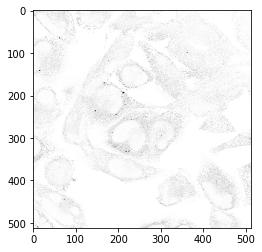

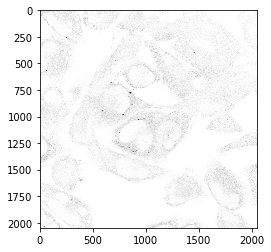

In [90]:
img1 = open_rgby_png(path=IMAGES, 
                 id='10580_1610_C1_1')
img2 = open_rgby_jpg(path=IMAGES,
                 id='10580_1610_C1_1')

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [8]:
!du -sh {PNGS_512}
!du -sh {JPGS_FULL}

26G	/home/Deep_Learner/work/network/datasets/human-protein-atlas-image-classification/stage1_data/extra_HPAv18_pngs_512
58G	/home/Deep_Learner/work/network/datasets/human-protein-atlas-image-classification/stage1_data/extra_HPAv18_jpgs_fullSize


In [13]:
len(imgList) - len(list(PNGS_512.iterdir()))/4

12.0

In [14]:
len(imgList) - len(list(JPGS_FULL.iterdir()))/4

13.25